In [141]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [142]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.layer = nn.Linear(self.input_dim, self.output_dim)
    
    def forward(self, data):
        out = self.layer(data)
        return out

In [163]:
data = pd.read_csv('data-with-stats.csv', dtype=str)
data

,Do you want to be in society?,Do you make an attempt to socialise?,Do you consume things to alter your perspective? (Alcohol and stuff),Are you depressed?,Do you try to improve yourself?,Would you compromise with a friend?,If you and another person were both thirsty and you only had enough water for one person; would you share with the other person?,If a colleague invited you to do something with them; how would you answer? (Date; hang-out; party; etc.),Are you anxious of social interaction?,Do you think you fit in with other people?,...,Are you physically in-shape?,What is your biological sex?,How tall are you?,How attractive are you (from 0 to 10),What is your BMI?,How many friends and colleagues do you currently have?,Rate your life right now.,Which climate do you live in?,X,Y
0,Y,Y,Y,0,0,A,N,Y,0,A,...,N,othersex,11,23,34,43,53,polar,-3,2.25
1,D,A,0,A,A,D,Y,Y,0,0,...,Y,male,12,23,32,41,54,tropical,-1,4
2,D,0,Y,N,Y,Y,Y,Y,N,N,...,N,othersex,14,23,33,41,53,mild,-2,0.75
3,A,A,D,D,Y,N,N,N,A,N,...,Y,female,12,21,32,41,52,dry,-0.5,1.5
4,0,Y,Y,D,Y,0,Y,N,0,Y,...,D,female,14,22,32,41,52,snow,-3.5,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,A,A,0,Y,N,Y,Y,Y,0,...,0,female,15,24,31,43,54,dry,-0.5,3.5
196,Y,N,A,N,0,0,Y,Y,D,N,...,A,female,15,21,32,42,53,mild,-2.5,0.75
197,A,D,Y,N,D,N,N,N,0,0,...,0,female,11,22,32,42,51,tropical,0.5,-3.25
198,Y,A,Y,D,Y,N,Y,N,Y,A,...,D,female,12,23,31,42,52,tropical,0.5,3


In [165]:
results = data.values[:,-2:].astype(float)
results

array([[-3.  ,  2.25],
       [-1.  ,  4.  ],
       [-2.  ,  0.75],
       [-0.5 ,  1.5 ],
       [-3.5 , -2.  ],
       [-5.5 , -2.  ],
       [-7.  ,  2.25],
       [-3.5 , -2.  ],
       [-3.  ,  3.25],
       [ 0.5 ,  6.  ],
       [-2.  , -3.  ],
       [-5.  ,  0.75],
       [-6.  ,  3.5 ],
       [-2.  , -4.5 ],
       [-2.  ,  2.25],
       [-2.  ,  2.25],
       [-2.5 , -3.25],
       [ 3.  ,  0.75],
       [-6.  , -4.25],
       [-5.  ,  3.  ],
       [ 2.5 ,  2.25],
       [-3.  ,  0.5 ],
       [ 4.5 ,  2.5 ],
       [-1.  , -1.5 ],
       [-7.  , -2.25],
       [-2.  , -2.  ],
       [-2.  , -2.75],
       [-2.  ,  2.25],
       [-2.  , -1.5 ],
       [-4.  ,  0.  ],
       [ 0.  , -0.25],
       [-6.  ,  0.  ],
       [-1.  , -2.75],
       [ 3.  , -0.5 ],
       [-4.5 ,  0.5 ],
       [-4.  ,  4.25],
       [-2.  ,  0.75],
       [-3.  , -0.25],
       [ 1.  ,  2.5 ],
       [ 0.  , -4.5 ],
       [ 0.5 ,  5.25],
       [ 3.  ,  0.5 ],
       [-2.  , -3.25],
       [-5.

In [166]:
answers = pd.get_dummies(data[data.columns[:-2]])
answers

,Do you want to be in society?_0,Do you want to be in society?_A,Do you want to be in society?_D,Do you want to be in society?_N,Do you want to be in society?_Y,Do you make an attempt to socialise?_0,Do you make an attempt to socialise?_A,Do you make an attempt to socialise?_D,Do you make an attempt to socialise?_N,Do you make an attempt to socialise?_Y,...,How many friends and colleagues do you currently have?_43,Rate your life right now._51,Rate your life right now._52,Rate your life right now._53,Rate your life right now._54,Which climate do you live in?_dry,Which climate do you live in?_mild,Which climate do you live in?_polar,Which climate do you live in?_snow,Which climate do you live in?_tropical
0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,0
196,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
197,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
198,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


/home/nathanielbd/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


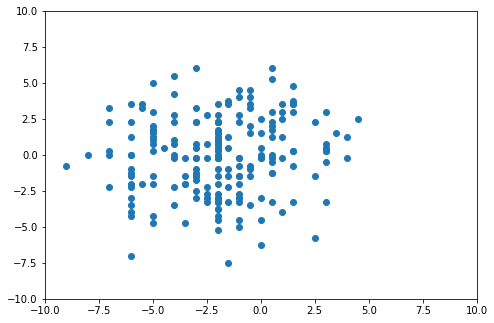

In [167]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.scatter(results[:,0], results[:,1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
fig.show()

In [171]:
# answers = answers.values
answers = answers.astype(int)
results = results.astype(float)
CUTOFF = answers.shape[0]-20
train_ans, train_res = answers[:CUTOFF], results[:CUTOFF]
test_ans, test_res = answers[CUTOFF:], results[CUTOFF:]
# test_data = pd.read_csv('data.csv')
# test_ans = pd.get_dummies(test_data[test_data.columns[:-2]]).values.astype(int)
# test_res = test_data.values[:,-2:].astype(float)
train_dataset = list(zip(torch.from_numpy(train_ans), torch.from_numpy(train_res)))
test_dataset = list(zip(torch.from_numpy(test_ans), torch.from_numpy(test_res)))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1)

In [169]:
model = MultiLayerPerceptron(answers.shape[1], results.shape[1])
optimizer = optim.SGD(model.parameters(), lr=1e-4)
criterion = nn.L1Loss()
losses = []
EPOCHS = 5000
for epoch in range(EPOCHS):
    loss = 0
    for ans, res in train_loader:
        ans, res = ans.float(), res.float()
        optimizer.zero_grad()
        pred_res = model(ans)
        train_loss = criterion(pred_res, res)
        train_loss.backward()
        optimizer.step()
        loss += train_loss.item()
    losses.append(loss)
    if (epoch+1)%100==0:
        print(f'epoch: {epoch+1}/{EPOCHS}, loss: {loss}')

epoch: 100/5000, loss: 334.48558624088764
epoch: 200/5000, loss: 285.41518031805754
epoch: 300/5000, loss: 240.2845428287983
epoch: 400/5000, loss: 199.95029697567225
epoch: 500/5000, loss: 165.4953440129757
epoch: 600/5000, loss: 138.4531302973628
epoch: 700/5000, loss: 116.89420291036367
epoch: 800/5000, loss: 99.67434594035149
epoch: 900/5000, loss: 86.033174270764
epoch: 1000/5000, loss: 75.18342796433717
epoch: 1100/5000, loss: 66.91130290273577
epoch: 1200/5000, loss: 59.5535251814872
epoch: 1300/5000, loss: 52.98746948689222
epoch: 1400/5000, loss: 47.10877831559628
epoch: 1500/5000, loss: 42.06258142273873
epoch: 1600/5000, loss: 37.38522044941783
epoch: 1700/5000, loss: 33.53769929148257
epoch: 1800/5000, loss: 30.304077536799014
epoch: 1900/5000, loss: 27.32060553971678
epoch: 2000/5000, loss: 24.88359851576388
epoch: 2100/5000, loss: 22.956732145044953
epoch: 2200/5000, loss: 21.440645958762616
epoch: 2300/5000, loss: 19.9990170923993
epoch: 2400/5000, loss: 18.6049131182953

In [172]:
for ans, res in test_loader:
    ans, res = ans.float(), res.float()
    pred_res = model(ans)
    loss = criterion(pred_res, res)
    print(f'loss: {loss}')

loss: 0.01585209369659424
loss: 0.014505274593830109
loss: 0.0008624494075775146
loss: 0.021335899829864502
loss: 0.00222933292388916
loss: 0.04304540157318115
loss: 0.021154284477233887
loss: 0.06730997562408447
loss: 0.020858705043792725
loss: 0.08474719524383545
loss: 0.016051530838012695
loss: 0.02927100658416748
loss: 0.0006141439080238342
loss: 0.01692730188369751
loss: 0.03487527370452881
loss: 0.011030316352844238
loss: 0.007185757160186768
loss: 0.038553014397621155
loss: 0.008395969867706299
loss: 0.07301095128059387


In [174]:
params = list(model.parameters())
params

[Parameter containing:
 tensor([[-3.1803e-02, -3.1822e-02, -3.1813e-02, -3.1803e-02, -3.2064e-02,
          -2.8222e-02, -2.7987e-02, -2.8428e-02, -2.7855e-02, -2.7905e-02,
          -4.2719e-02, -4.2253e-02, -4.2444e-02, -4.2331e-02, -4.2068e-02,
          -7.1248e-03, -6.6714e-03, -6.6916e-03, -6.8320e-03, -6.5943e-03,
          -1.4525e-02, -1.4682e-02, -1.4578e-02, -1.4254e-02, -1.4452e-02,
          -4.4172e-03, -4.3639e-03, -4.6436e-03, -4.6330e-03, -4.1084e-03,
          -6.8951e-02, -6.8498e-02, -2.3893e-02, -2.3954e-02, -4.0346e-02,
          -4.0130e-02, -4.0029e-02, -3.9742e-02, -3.9991e-02, -1.3686e-02,
          -1.3233e-02, -1.3771e-02, -1.3287e-02, -1.3344e-02, -8.4937e-03,
          -8.9803e-03, -1.4647e-02, -1.4983e-02, -1.4214e-02, -1.4868e-02,
          -1.4615e-02,  1.1926e-02,  1.1983e-02,  1.1803e-02,  1.2103e-02,
           1.1858e-02, -3.5672e-02, -3.5810e-02, -3.6562e-02, -3.6494e-02,
          -3.6781e-02, -3.6511e-02, -3.6497e-02, -9.1779e-02, -9.1868e-02,
  

In [190]:
x_weights = params[0][0].detach()
columns = pd.get_dummies(data[data.columns[:-2]]).columns
x_weights = pd.DataFrame(np.array([x_weights.numpy()]), columns=columns)
x_weights.to_csv('x_weights.csv')
x_weights

,Do you want to be in society?_0,Do you want to be in society?_A,Do you want to be in society?_D,Do you want to be in society?_N,Do you want to be in society?_Y,Do you make an attempt to socialise?_0,Do you make an attempt to socialise?_A,Do you make an attempt to socialise?_D,Do you make an attempt to socialise?_N,Do you make an attempt to socialise?_Y,...,How many friends and colleagues do you currently have?_43,Rate your life right now._51,Rate your life right now._52,Rate your life right now._53,Rate your life right now._54,Which climate do you live in?_dry,Which climate do you live in?_mild,Which climate do you live in?_polar,Which climate do you live in?_snow,Which climate do you live in?_tropical
0,-0.031803,-0.031822,-0.031813,-0.031803,-0.032064,-0.028222,-0.027987,-0.028428,-0.027855,-0.027905,...,-0.011492,-0.018658,-0.018252,-0.018432,-0.017999,-0.024985,-0.024212,-0.024622,-0.024368,-0.024806


In [191]:
y_weights = params[0][1].detach()
y_weights = pd.DataFrame(np.array([y_weights.numpy()]), columns=columns)
y_weights.to_csv('y_weights.csv')
y_weights

,Do you want to be in society?_0,Do you want to be in society?_A,Do you want to be in society?_D,Do you want to be in society?_N,Do you want to be in society?_Y,Do you make an attempt to socialise?_0,Do you make an attempt to socialise?_A,Do you make an attempt to socialise?_D,Do you make an attempt to socialise?_N,Do you make an attempt to socialise?_Y,...,How many friends and colleagues do you currently have?_43,Rate your life right now._51,Rate your life right now._52,Rate your life right now._53,Rate your life right now._54,Which climate do you live in?_dry,Which climate do you live in?_mild,Which climate do you live in?_polar,Which climate do you live in?_snow,Which climate do you live in?_tropical
0,-0.037255,0.970496,-1.032171,-0.294172,0.201796,-0.021775,0.97649,-1.01838,-0.285482,0.22067,...,0.011816,-0.023406,-0.038437,-0.007983,-0.008585,0.02483,0.031717,0.048514,0.028649,0.018909
